In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [2]:
#Load application dataframe
application_data=pd.read_csv(r'application_data.csv')

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Shape of the data
application_data.shape

(307511, 122)

In [5]:
#Displayind columns from the dataframe
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
# Sum of null values for all the columns
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [7]:
#Finding percentage of missing values for each column
percent_missing = round(100*(application_data.isnull().sum()/len(application_data.index)), 2)
percent_missing

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   65.99
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                  

# Cleaning the data

In [8]:
# Dropping the columns from the dataframe which are have higest null percentage
columns = application_data.columns
missing_value_df = pd.DataFrame({'column_name': columns,
                             'percent_missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 45]
missing_drop = list(missing_value_df.column_name)
application_data = application_data.drop(missing_drop, axis=1)
# Shape of dataframe after dropping the columns
application_data.shape

(307511, 73)

In [9]:
# Drop Duplicates if any

application_data.drop_duplicates(inplace= True)
application_data.shape

(307511, 73)

In [10]:
#dtypes of the application data
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL  

In [11]:
#Selecting necessary columns for the analysis 
data=application_data[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS','DAYS_EMPLOYED', 'OCCUPATION_TYPE']]
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,DAYS_EMPLOYED,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,1.0,-637,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,2.0,-1188,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,1.0,-225,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,2.0,-3039,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,1.0,-3038,Core staff


In [12]:
#Shape of dataframe after selecting the columns
data.shape

(307511, 19)

In [13]:
# Manipulating applicant age in form of days
data['Applicant Age']=np.ceil(data['DAYS_BIRTH']/-365)
data['Applicant Age']=data['Applicant Age'].astype(int) 
data['Applicant Age'].head()

0    26
1    46
2    53
3    53
4    55
Name: Applicant Age, dtype: int32

# Finding Outliers 

In [14]:
# Finding outlier for the column days_employed
data["DAYS_EMPLOYED"].quantile([0,.25,.5,.75,.95,.99,.999,1])

0.000    -17912.0
0.250     -2760.0
0.500     -1213.0
0.750      -289.0
0.950    365243.0
0.990    365243.0
0.999    365243.0
1.000    365243.0
Name: DAYS_EMPLOYED, dtype: float64

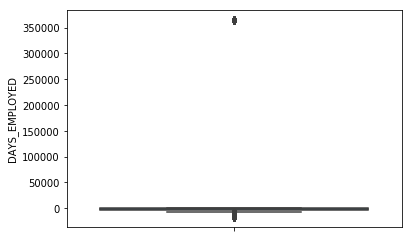

In [15]:
#Box plot for days employed column 
sns.boxplot(y=data["DAYS_EMPLOYED"])

In [16]:
#Finding outlier for cnt_children column
data["CNT_CHILDREN"].quantile([0,.25,.5,.75,.95,.99,.999,1])

0.000     0.0
0.250     0.0
0.500     0.0
0.750     1.0
0.950     2.0
0.990     3.0
0.999     4.0
1.000    19.0
Name: CNT_CHILDREN, dtype: float64

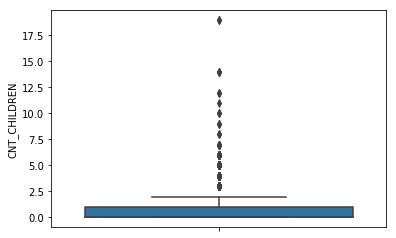

In [17]:
#Box plot for cnt children column
sns.boxplot( y=data["CNT_CHILDREN"])

In [18]:
#Finding outlier for amt_income_total column
data["AMT_INCOME_TOTAL"].quantile([0,.25,.5,.75,.95,.99,.999,1])

0.000        25650.0
0.250       112500.0
0.500       147150.0
0.750       202500.0
0.950       337500.0
0.990       472500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

# We can see there is huge differece between 99 to 100 percentile, so clearly values greater than 900000 are outliers.


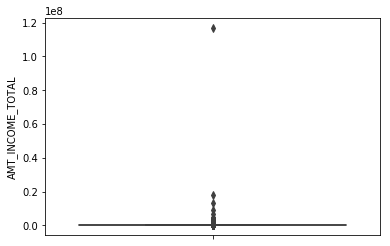

In [19]:
#Box plot for amt_income_total
sns.boxplot( y=data["AMT_INCOME_TOTAL"])

In [20]:
#Finding outlier for CNT_FAM_MEMBERS column
data["CNT_FAM_MEMBERS"].quantile([0,.25,.5,.75,.95,.99,.999,1])

0.000     1.0
0.250     2.0
0.500     2.0
0.750     3.0
0.950     4.0
0.990     5.0
0.999     6.0
1.000    20.0
Name: CNT_FAM_MEMBERS, dtype: float64

# We can see there is huge differece between 99 to 100 percentile, so clearly values greater than 6 are outliers.

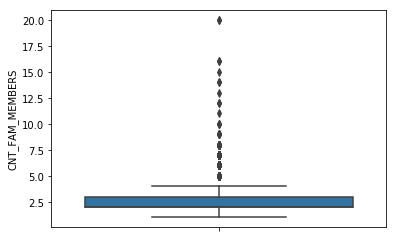

In [21]:
#Box for CNT_FAM_MEMBERS column
sns.boxplot( y=data["CNT_FAM_MEMBERS"])

# Data Imbalance Ratio

Percentage of all other cases we get 91.93 %
Percentage of Client with Payment Difficulties 8.07 %


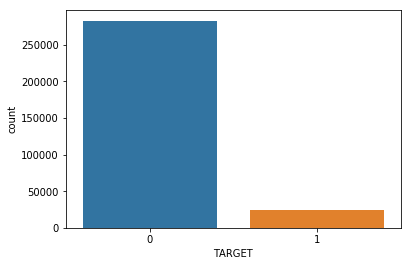

In [22]:
# Data Imbalance
dfTarget0 = data[data["TARGET"] == 0]
dfTarget1 = data[data["TARGET"] == 1]

# All other cases are repersented by 0 from the taget column
count_all_other_cases = len(dfTarget0)

# Client with payment difficulties are represented by 1 from the target column
count_client_with_payment_difficulties = len(dfTarget1)

#Percentage of all other cases
percentage_of_all_other_cases = count_all_other_cases/(count_all_other_cases+count_client_with_payment_difficulties)

#Percentage of client with payment difficulties
percentage_of_payment_difficulties= count_client_with_payment_difficulties/(count_all_other_cases+count_client_with_payment_difficulties)

print("Percentage of all other cases we get",round((percentage_of_all_other_cases*100),2),"%")
print("Percentage of Client with Payment Difficulties",round((percentage_of_payment_difficulties*100),2), "%")
sns.countplot("TARGET",data=data)

In [23]:
#Target0 dataframe
dfTarget0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,DAYS_EMPLOYED,OCCUPATION_TYPE,Applicant Age
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,2.0,-1188,Core staff,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,1.0,-225,Laborers,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,2.0,-3039,Laborers,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,1.0,-3038,Core staff,55
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,-16941,2.0,-1588,Laborers,47


In [24]:
#Target1 dataframe
dfTarget1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,DAYS_EMPLOYED,OCCUPATION_TYPE,Applicant Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,1.0,-637,Laborers,26
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,-18724,1.0,-2628,Cooking staff,52
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,2.0,-1262,Laborers,48
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,2.0,-3597,Sales staff,37
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,2.0,365243,NaN,68



# Univariate Analysis for Target0 Dataframe


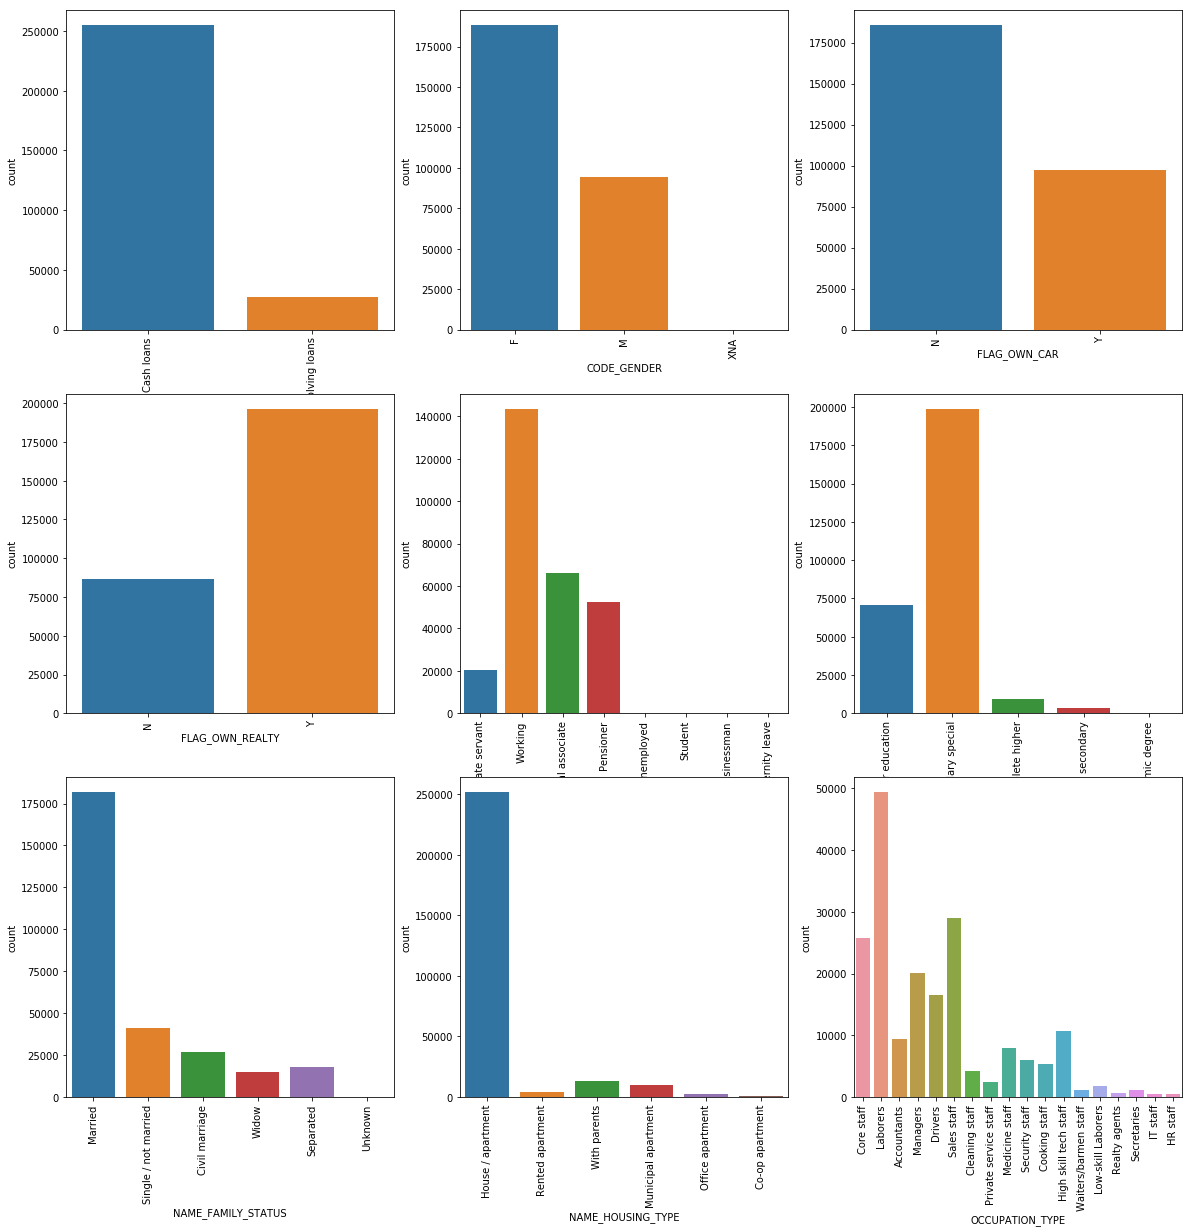

In [29]:
#Perform Univariate analysis for Target0 Variable
univariateCols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for variable, subplot in zip(univariateCols, ax.flatten()):
    sns.countplot(dfTarget0[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)    

# Univariate Analysis for Target1

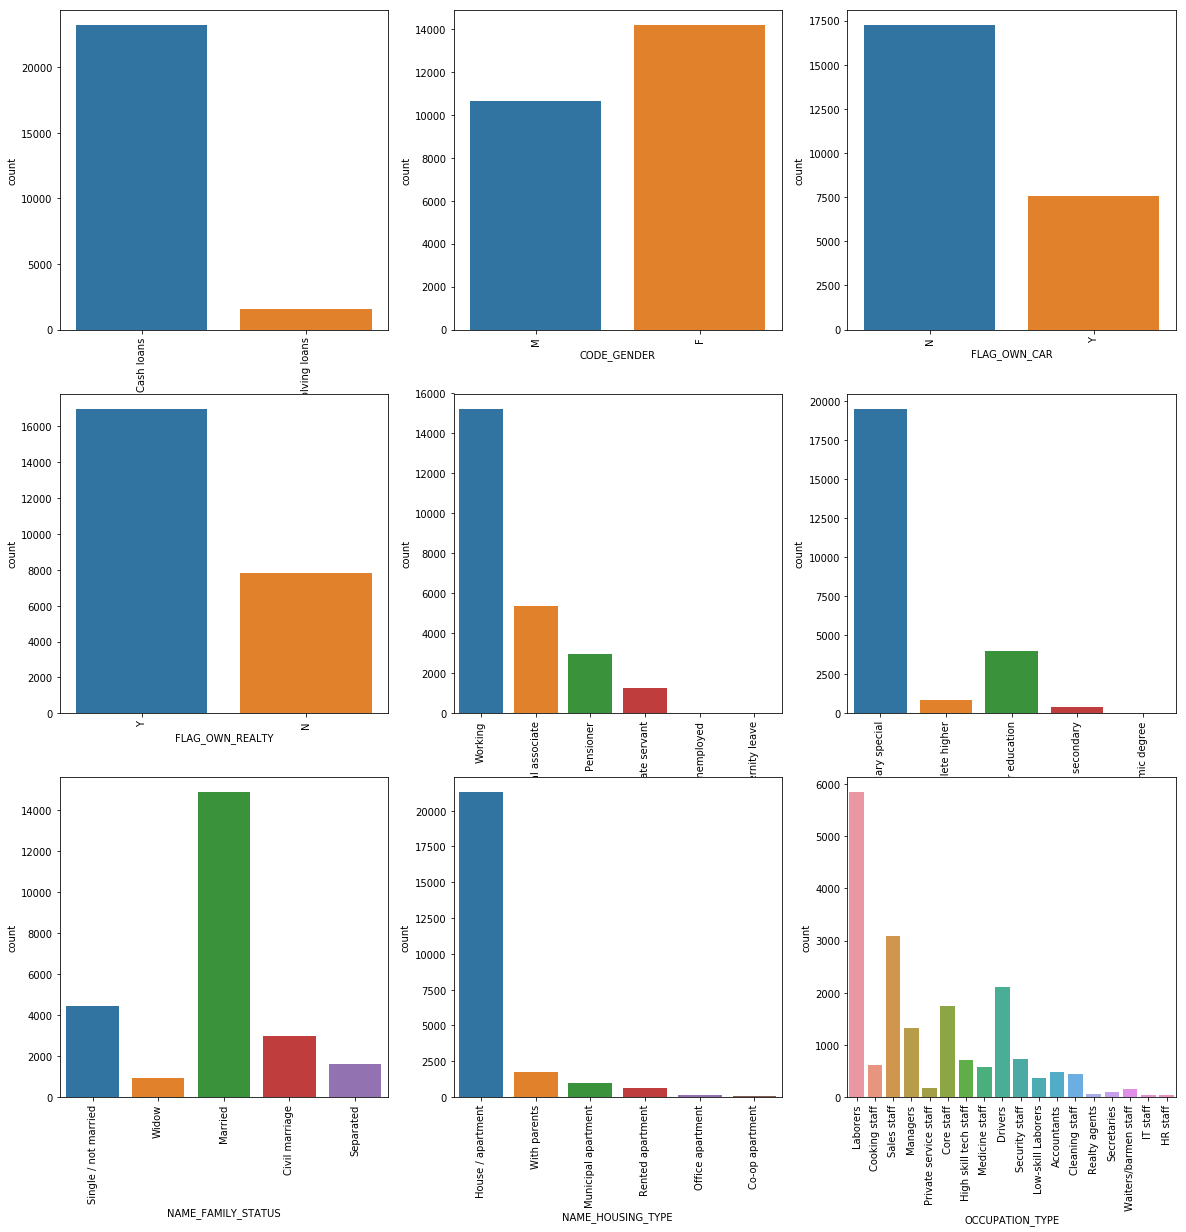

In [26]:
#Perform Univariate analysis for Target1 Variable
univariateCols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for variable, subplot in zip(univariateCols, ax.flatten()):
    sns.countplot(dfTarget1[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# BiVariate Analysis

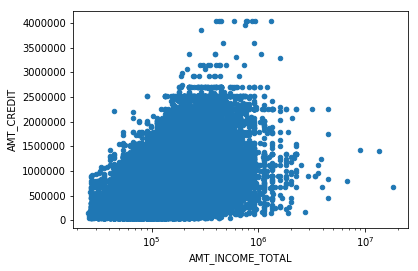

In [27]:
## Bivariate Analysis for Target==0
## Bivariate Analysis for total amount and goods price.
ax = dfTarget0.plot.scatter(x='AMT_INCOME_TOTAL', y='AMT_CREDIT')
ax.set_xscale('log')

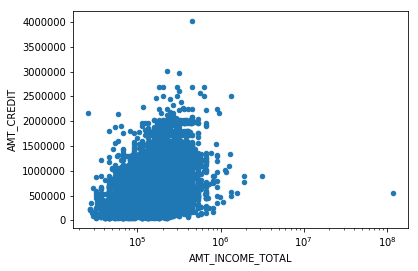

In [28]:
## Bivariate Analysis for Target==1
## Bivariate Analysis for total amount and goods price.
ax = dfTarget1.plot.scatter(x='AMT_INCOME_TOTAL', y='AMT_CREDIT')
ax.set_xscale('log')

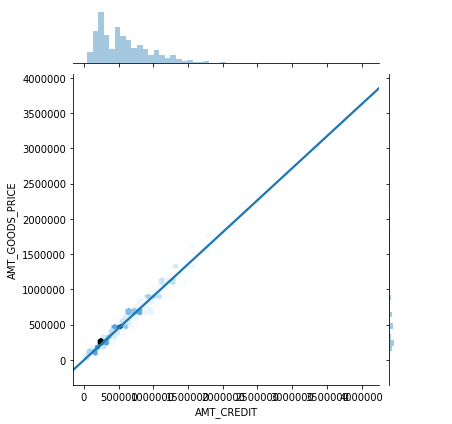

In [30]:
## Bivariate Analysis for Target=0
## Bivariate Analysis for credit amount and goods price.
dfTarget0[['AMT_GOODS_PRICE']]=dfTarget0.AMT_GOODS_PRICE.astype(float)
g = sns.jointplot(x = 'AMT_CREDIT', 
              y = 'AMT_GOODS_PRICE',
              data = dfTarget0, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)
sns.regplot(dfTarget0.AMT_CREDIT, dfTarget0.AMT_GOODS_PRICE, ax=g.ax_joint, scatter=False);

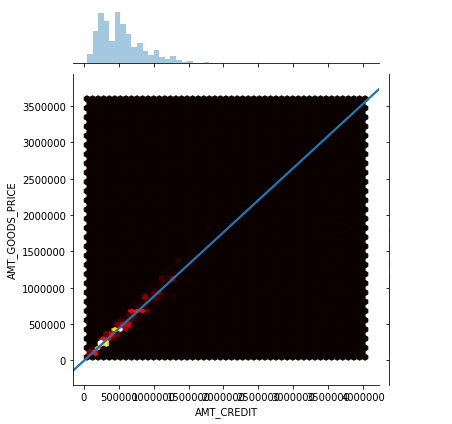

In [31]:
## Bivariate Analysis for Target==1
## Bivariate Analysis for credit amount and goods price.
dfTarget1[['AMT_GOODS_PRICE']]=dfTarget1.AMT_GOODS_PRICE.astype(float)
g = sns.jointplot(x = 'AMT_CREDIT', 
              y = 'AMT_GOODS_PRICE',
              data = dfTarget1, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)
sns.regplot(dfTarget1.AMT_CREDIT, dfTarget1.AMT_GOODS_PRICE, ax=g.ax_joint, scatter=False);

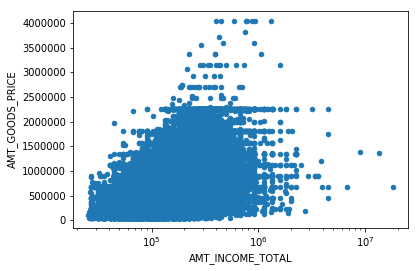

In [32]:
## Bivariate Analysis for Target==0
## Bivariate Analysis for total amount and goods price.
ax = dfTarget0.plot.scatter(x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE')
ax.set_xscale('log')

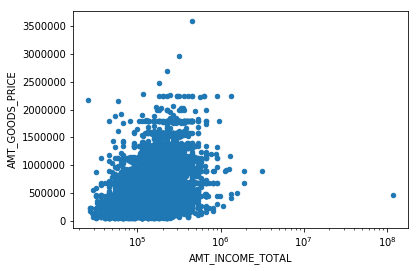

In [33]:
## Bivariate Analysis for Target==1
## Bivariate Analysis for total amount and goods price.
ax = dfTarget1.plot.scatter(x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE')
ax.set_xscale('log')

# Multivariate Analysis

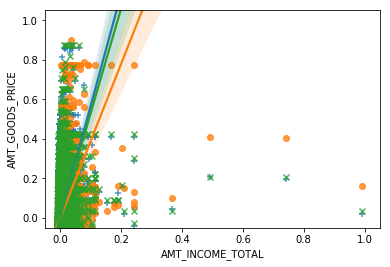

In [34]:
## Multivariate  Analysis for Target==0
##  different loans behaviour against total_income (this does not look  that relevant because we do not know the loan tenure)
# dfTarget0[['AMT_ANNUITY']]=dfTarget0.AMT_GOODS_PRICE.astype(float)
loan_cols = [ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']
loan_normalised_df = dfTarget0[loan_cols].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

sns.regplot(x = loan_normalised_df.AMT_INCOME_TOTAL, y = loan_normalised_df.AMT_CREDIT,    marker="+")
sns.regplot(x = loan_normalised_df.AMT_INCOME_TOTAL, y = loan_normalised_df.AMT_ANNUITY,    marker="o")
sns.regplot(x = loan_normalised_df.AMT_INCOME_TOTAL, y = loan_normalised_df.AMT_GOODS_PRICE,    marker="x")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

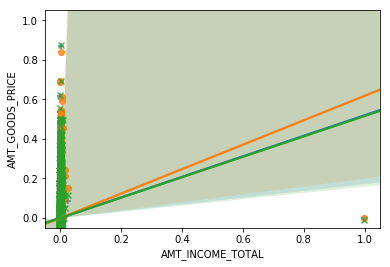

In [35]:
## Multivariate  Analysis for Target==1
##  different loans behaviour against total_income (this does not look  that relevant because we do not know the loan tenure)
# dfTarget1[['AMT_ANNUITY']]=dfTarget0.AMT_GOODS_PRICE.astype(float)
loan_cols = [ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
loan_normalised_df = dfTarget1[loan_cols].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

sns.regplot(x = loan_normalised_df.AMT_INCOME_TOTAL, y = loan_normalised_df.AMT_CREDIT,    marker="+")
sns.regplot(x = loan_normalised_df.AMT_INCOME_TOTAL, y = loan_normalised_df.AMT_ANNUITY,    marker="o")
sns.regplot(x = loan_normalised_df.AMT_INCOME_TOTAL, y = loan_normalised_df.AMT_GOODS_PRICE,    marker="x")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

## Analysis for Applicants Age with respect to Target

In [36]:
# Binning and analysis for applicants age with respect to target

app_age_df = pd.DataFrame((data.groupby("Applicant Age").mean()["TARGET"])*100)
app_age_df.reset_index(inplace=True)
bins = [20,30, 40, 50, 60, 70]
app_age_df['Age_Bin'] = pd.cut(app_age_df["Applicant Age"], bins)
df2 = app_age_df.groupby("Age_Bin").mean()
df2.reset_index(inplace=True)
df2.drop(columns=["Applicant Age"])

,Age_Bin,TARGET
0,"(20, 30]",10.375511
1,"(30, 40]",9.616492
2,"(40, 50]",7.631142
3,"(50, 60]",6.122158
4,"(60, 70]",4.031266


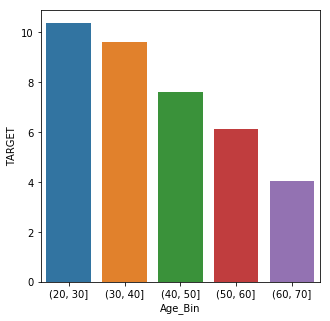

In [37]:
plt.figure(figsize=(5,5))
sns.barplot(x=df2["Age_Bin"],y=df2["TARGET"])
plt.show()

# Credit Amount Analysis with Respect to target

In [38]:
#Making a bins for credit amount analysis wrt target
bins = [0, 45000, 254700, 432000, 604152, 900000, 4050000]
labels = [0, 20, 40, 60, 80, 100]
data['CREDIT_BIN'] = pd.cut(data["AMT_CREDIT"], bins,labels)
df6 = data[["TARGET", "CREDIT_BIN"]]
df7 = pd.DataFrame(df6.groupby("CREDIT_BIN").mean()["TARGET"] * 100)
df7.reset_index(inplace=True)
df7

,CREDIT_BIN,TARGET
0,"(0, 45000]",5.217391
1,"(45000, 254700]",7.244764
2,"(254700, 432000]",9.172433
3,"(432000, 604152]",10.054913
4,"(604152, 900000]",7.854867
5,"(900000, 4050000]",6.075163


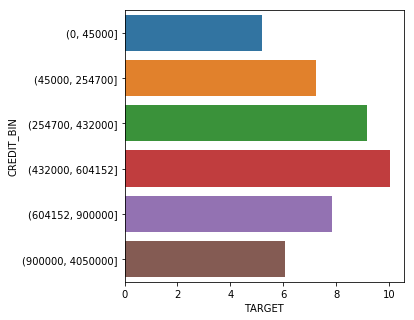

In [39]:
plt.figure(figsize=(5,5))
sns.barplot(y=df7["CREDIT_BIN"],x=df7["TARGET"])
plt.show()

# Finding Correlation

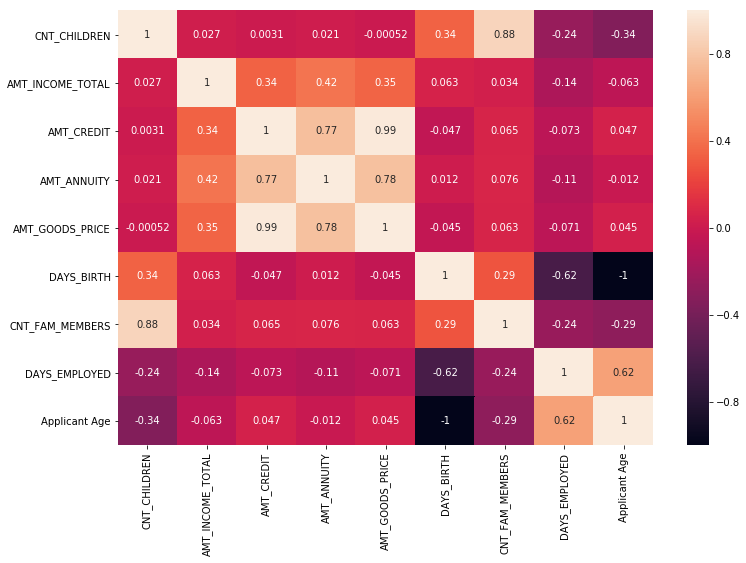

In [40]:
# Getting correlation for Target variable 0

df_target0_corr=dfTarget0.iloc[:,2:]
plt.figure(figsize=(12, 8))

corr = df_target0_corr.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

# The columns amt_credit,amt_annuity,amt_goods_price are highly correlated from Target0

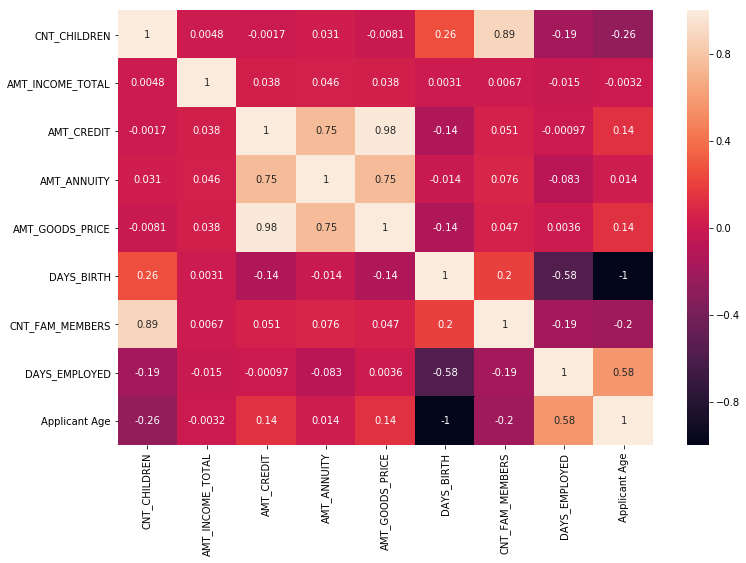

In [41]:
# getting correlation for Target variable 1

df_target1_corr=dfTarget1.iloc[:,2:]
plt.figure(figsize=(12, 8))

corr = df_target1_corr.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

# from the heat map we can say that 3 variables(Amt_credit,amt_annuity,amt_goodsprice) are correlated in both target varable 0 as well as target variable 1 

In [42]:
# Correlation matrix for target variable with other variables
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_FAM_MEMBERS,DAYS_EMPLOYED,Applicant Age
SK_ID_CURR,1,-0.0021,-0.0011,-0.0018,-0.00034,-0.00043,-0.00023,-0.0015,-0.0029,0.0014,0.0015
TARGET,-0.0021,1,0.019,-0.004,-0.03,-0.013,-0.04,0.078,0.0093,-0.045,-0.078
CNT_CHILDREN,-0.0011,0.019,1,0.013,0.0021,0.021,-0.0018,0.33,0.88,-0.24,-0.33
AMT_INCOME_TOTAL,-0.0018,-0.004,0.013,1,0.16,0.19,0.16,0.027,0.016,-0.064,-0.027
AMT_CREDIT,-0.00034,-0.03,0.0021,0.16,1,0.77,0.99,-0.055,0.063,-0.067,0.055
AMT_ANNUITY,-0.00043,-0.013,0.021,0.19,0.77,1,0.78,0.0094,0.076,-0.1,-0.0095
AMT_GOODS_PRICE,-0.00023,-0.04,-0.0018,0.16,0.99,0.78,1,-0.053,0.061,-0.065,0.053
DAYS_BIRTH,-0.0015,0.078,0.33,0.027,-0.055,0.0094,-0.053,1,0.28,-0.62,-1
CNT_FAM_MEMBERS,-0.0029,0.0093,0.88,0.016,0.063,0.076,0.061,0.28,1,-0.23,-0.28
DAYS_EMPLOYED,0.0014,-0.045,-0.24,-0.064,-0.067,-0.1,-0.065,-0.62,-0.23,1,0.62


In [44]:
# Find correlations with the target and sort
correlations = data.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print(correlations.head(15))

TARGET              1.000000
DAYS_BIRTH          0.078239
CNT_CHILDREN        0.019187
CNT_FAM_MEMBERS     0.009308
SK_ID_CURR         -0.002108
AMT_INCOME_TOTAL   -0.003982
AMT_ANNUITY        -0.012817
AMT_CREDIT         -0.030369
AMT_GOODS_PRICE    -0.039645
DAYS_EMPLOYED      -0.044932
Applicant Age      -0.078237
Name: TARGET, dtype: float64


# Merging data and cleaning

In [45]:
#Load previous data and merge application data with previous application on sk_id_curr
previous_application=pd.read_csv(r'previous_application.csv')
merge_data = application_data.merge(previous_application, how = 'inner', on="SK_ID_CURR")
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188

In [46]:
#shape of the merged data
merge_data.shape

(1413701, 109)

In [47]:
#find missing values count for the columns
merge_percent_missing = round(100*(merge_data.isnull().sum()/len(merge_data.index)), 2)
merge_percent_missing

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_x             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT_x                     0.00
AMT_ANNUITY_x                    0.01
AMT_GOODS_PRICE_x                0.09
NAME_TYPE_SUITE_x                0.25
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [48]:
# Remove columns which consist of highest missing values
thresh = len(merge_data) * .5
merge_data.dropna(thresh = thresh, axis = 1, inplace = True)
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [49]:
#Selecting only necessary columns to perform analysis
merged_data=merge_data[['SK_ID_CURR','TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_RATING_CLIENT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH','NAME_GOODS_CATEGORY',
 'DAYS_EMPLOYED','OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE',
 'EXT_SOURCE_3','NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE']] 
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_RATING_CLIENT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,NAME_GOODS_CATEGORY,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_3,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,179055.0,406597.5,24700.5,351000.0,2,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,Vehicles,-637,Laborers,1.0,Business Entity Type 3,0.139376,Approved,New
1,100003,0,Cash loans,F,N,N,0,270000.0,900000.0,1293502.5,35698.5,1129500.0,1,State servant,Higher education,Married,House / apartment,0.003541,-16765,XNA,-1188,Core staff,2.0,School,NaN,Approved,Repeater
2,100003,0,Cash loans,F,N,N,0,270000.0,337500.0,1293502.5,35698.5,1129500.0,1,State servant,Higher education,Married,House / apartment,0.003541,-16765,Furniture,-1188,Core staff,2.0,School,NaN,Approved,Refreshed
3,100003,0,Cash loans,F,N,N,0,270000.0,68809.5,1293502.5,35698.5,1129500.0,1,State servant,Higher education,Married,House / apartment,0.003541,-16765,Consumer Electronics,-1188,Core staff,2.0,School,NaN,Approved,Refreshed
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,24282.0,135000.0,6750.0,135000.0,2,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,Mobile,-225,Laborers,1.0,Government,0.729567,Approved,New


In [50]:
# merge_columns = merge_data.columns
# missing_values_df = pd.DataFrame({'column_name': merge_columns,
#                              'percent_missing': merge_percent_missing})
# missing_values_df = missing_values_df[missing_values_df['percent_missing'] > 45]
# missing_drop = list(missing_values_df.column_name)
# merged_data = merge_data.drop(missing_drop, axis=1)
# merged_data.shape

In [51]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 27 columns):
SK_ID_CURR                    1413701 non-null int64
TARGET                        1413701 non-null int64
NAME_CONTRACT_TYPE_x          1413701 non-null object
CODE_GENDER                   1413701 non-null object
FLAG_OWN_CAR                  1413701 non-null object
FLAG_OWN_REALTY               1413701 non-null object
CNT_CHILDREN                  1413701 non-null int64
AMT_INCOME_TOTAL              1413701 non-null float64
AMT_APPLICATION               1413701 non-null float64
AMT_CREDIT_x                  1413701 non-null float64
AMT_ANNUITY_x                 1413608 non-null float64
AMT_GOODS_PRICE_x             1412493 non-null float64
REGION_RATING_CLIENT          1413701 non-null int64
NAME_INCOME_TYPE              1413701 non-null object
NAME_EDUCATION_TYPE           1413701 non-null object
NAME_FAMILY_STATUS            1413701 non-null object
NAME_HOUSING_TYPE     

In [52]:
# merged_data = merged_data[['SK_ID_CURR','TARGET','AMT_GOODS_PRICE_x', 'AMT_CREDIT_x', 'NAME_CONTRACT_STATUS', 'OCCUPATION_TYPE', 'AMT_ANNUITY_x', 'NAME_CONTRACT_TYPE_x', 'AMT_APPLICATION']]
# merged_data.shape

# Outliers on merged data

In [53]:
#Finding outlier for merged data on column amt_application
merged_data["AMT_APPLICATION"].quantile([0,.25,.5,.75,.95,.99,.999,1])

0.000          0.0
0.250      19750.5
0.500      70870.5
0.750     180000.0
0.950     805500.0
0.990    1350000.0
0.999    2250000.0
1.000    5850000.0
Name: AMT_APPLICATION, dtype: float64

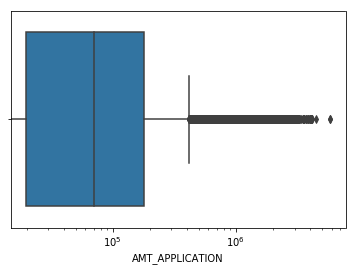

In [54]:
g = sns.boxplot(merged_data['AMT_APPLICATION'])
g.set_xscale('log')

In [55]:
#Finding outlier for merged data on column AMT_CREDIT_x
merged_data["AMT_CREDIT_x"].quantile([0,.25,.5,.75,.95,.99,.999,1])

0.000      45000.0
0.250     270000.0
0.500     508495.5
0.750     807984.0
0.950    1314117.0
0.990    1773000.0
0.999    2250000.0
1.000    4050000.0
Name: AMT_CREDIT_x, dtype: float64

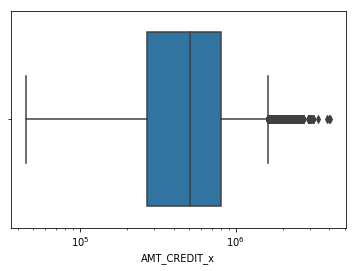

In [56]:
g = sns.boxplot(merged_data['AMT_CREDIT_x'])   
g.set_xscale('log')

# Univariate analysis on merged data

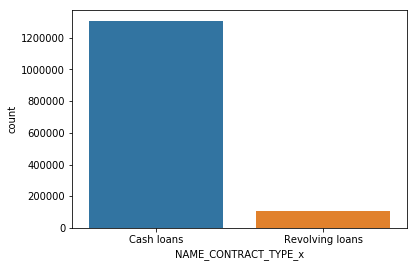

In [57]:
#Univariate analysis for name_contract type 
sns.countplot("NAME_CONTRACT_TYPE_x",data=merged_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

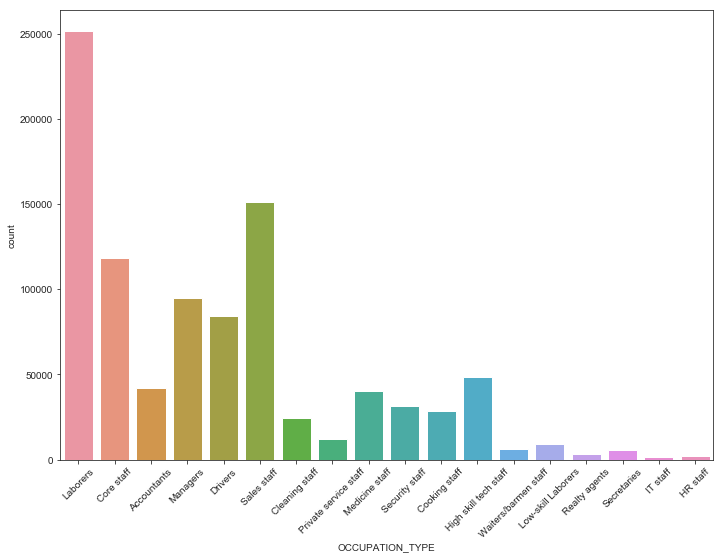

In [58]:
#Univariate analysis for occupation type
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot("OCCUPATION_TYPE",data=merged_data)   
plt.xticks(rotation=45)

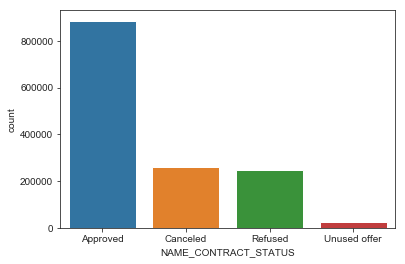

In [59]:
#Univariate analysis for contract status
sns.countplot("NAME_CONTRACT_STATUS",data=merged_data) 

# Bivariate Analysis on merged data

In [60]:
## get the count of contract status against goods cateogry
merged_data=merged_data[merged_data.NAME_GOODS_CATEGORY != 'XNA']
PrevLoanprocessDF_Grouped_Cat=pd.crosstab(merged_data["NAME_GOODS_CATEGORY"], merged_data['NAME_CONTRACT_STATUS'])
PrevLoanprocessDF_Grouped_Cat

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_GOODS_CATEGORY,,,,
Additional Service,97,0,12,0
Animals,1,0,0,0
Audio/Video,76930,24,7719,829
Auto Accessories,5539,2,569,118
Clothing and Accessories,17864,0,1654,72
Computers,74852,26,11493,3552
Construction Materials,19184,5,2116,51
Consumer Electronics,96270,21,7681,813
Direct Sales,277,0,52,1


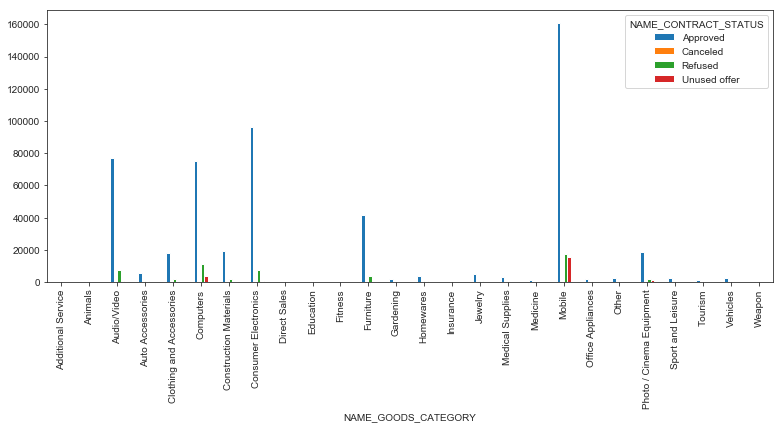

In [61]:
## Bank has approved highest for Mobile consumer goods. 
PrevLoanprocessDF_Grouped_Cat.plot.bar(figsize=(13, 5))

In [62]:
## Bivariate Analysis to see how many were approved based on accomponied
PrevLoanprocessDF_Grouped_acc=pd.crosstab(merged_data["NAME_CLIENT_TYPE"], merged_data['NAME_CONTRACT_STATUS'])
PrevLoanprocessDF_Grouped_acc

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,221997,20,6820,1835
Refreshed,49173,20,3466,3381
Repeater,265717,120,46466,17086
XNA,321,0,41,29


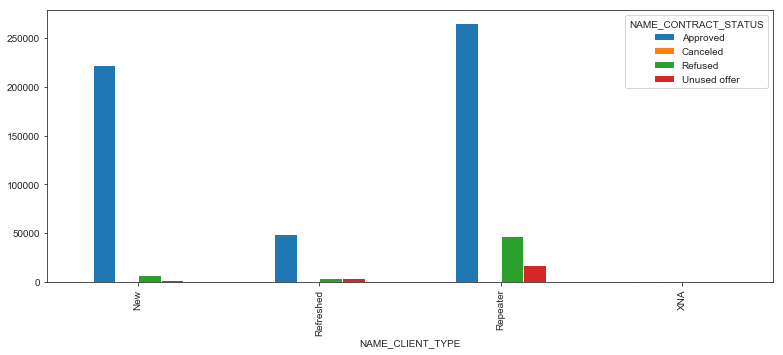

In [63]:
## Repeaters were approved mostly.
PrevLoanprocessDF_Grouped_acc.plot.bar(figsize=(13, 5))